In [1]:
import wandb
import numpy as np
from datasets import load_dataset, Dataset
from pixel_datasets.dataset_transformations import SyntheticDatasetTransform
from pixel_datasets.pixel_dataset_generator import PretrainingDataset
from jinja2 import Environment, FileSystemLoader, select_autoescape
from pixel_datasets.utils.utils import crop_image, concatenate_images, embed_image, plot_arrays


ImportError: libffi.so.7: cannot open shared object file: No such file or directory

In [24]:
from enum import Enum


class ExplicitEnum(str, Enum):
    """
    Enum with more explicit error message for missing values.
    """

    @classmethod
    def _missing_(cls, value):
        raise ValueError(
            f"{value} is not a valid {cls.__name__}, please select one of {list(cls._value2member_map_.keys())}"
        )

class IntervalStrategy(ExplicitEnum):
    NO = "no"
    STEPS = "steps"
    EPOCH = "epoch"
    
IntervalStrategy.NO == IntervalStrategy.STEPS

False

In [8]:
class IntervalStrategy(Enum): NO = "no"
a = Interval.NO

False

In [1]:
from cairocffi import FORMAT_ARGB32

ImportError: /home/knf792/anaconda3/envs/pixel-env/lib/python3.9/site-packages/_cffi_backend.cpython-39-x86_64-linux-gnu.so: undefined symbol: ffi_type_uint32, version LIBFFI_BASE_7.0

In [1]:
from pixel import (
    PIXELConfig,
    PIXELEmbeddings,
    PIXELForPreTraining,
    PIXELTrainerForPretraining,
    get_2d_sincos_pos_embed,
    process_remaining_strings,
    get_config_dict,
)

In [14]:
wandb.init(config="configs/intermediate_training_config.yaml", mode="disabled")

In [15]:
config = PIXELConfig.from_pretrained(
            wandb.config.model_name_or_path,
            attention_probs_dropout_prob=wandb.config.dropout_prob,
            hidden_dropout_prob=wandb.config.dropout_prob
)
config.update(
        {
            "mask_ratio": wandb.config.mask_ratio,
            "norm_pix_loss": wandb.config.norm_pix_loss,
            "architectures": [PIXELForPreTraining.__name__],
        }
    )       

In [26]:
model = PIXELForPreTraining.from_pretrained(
            wandb.config.model_name_or_path,
            from_tf=bool(".ckpt" in wandb.config.model_name_or_path),
            config=config,
        )


In [2]:
from transformers import Trainer, TrainingArguments
args = TrainingArguments("out")
args

TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=5e-05,
length_column_name=length,
load_best_model_at_end=False,
local_rank=-1,
log_level=-1,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=out/runs/May21_22-24-2

In [4]:
rng = np.random.RandomState(2)
text_dataset = load_dataset("wikipedia", "20220301.simple")

In [5]:
transform = SyntheticDatasetTransform(wandb.config, rng=rng)
train_dataset = PretrainingDataset(
        wandb.config, text_dataset["train"], transform, rng=rng
    )

INFO:root:randomizing dataset with worker id=0 and epoch=0
INFO:root:randomizing dataset with worker id=0 and epoch=1
INFO:root:randomizing dataset with worker id=0 and epoch=2


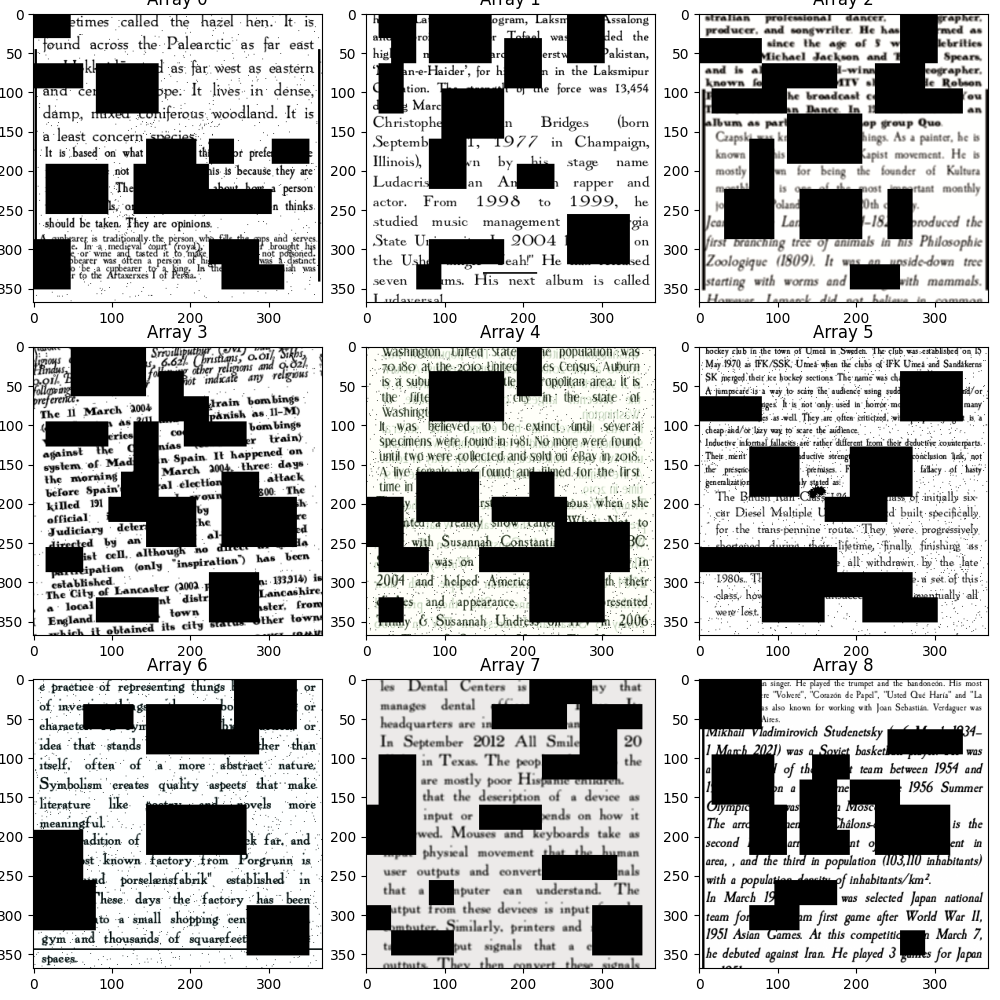

In [18]:
figures = []
for i in range(3):
    train_dataset.set_epoch(i)
    counter = 0
    for batch in train_dataset:
        if counter == 3:
            break
        im = batch["pixel_values"].numpy().astype("uint8").transpose(1, 2, 0)
        mask = batch["patch_mask"].numpy().reshape(23, 23)
        mask = np.kron(mask, np.ones((16, 16))).astype("uint8")
        
        im = im * (1 - mask[..., None])
        figures.append(im)
        counter += 1

im = plot_arrays(figures)
im

In [13]:
mask.min()

0.0